# practicalMixGaussC

The goal of this part of the lab is to fit a mixture of gaussians model to some multi-dimensional data. To do this, we will first generate some data from a known mixture of gaussians model and fit our own mixture of gaussians model to the generated data. The parameters from our estimated mixture of gaussians model should roughly match those of the original known model. 

Note that you should not use multivariate_normal.pdf for calculating likelihood.

You should use this template for your code and fill in the missing 
sections marked "TO DO."



In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Construct Ground Truth Mixture of Gaussians Model and Plot Some Points

Define some true parameters for our ground truth mixture of $k$ Gaussians model. We will represent the 
mixtures of Gaussians as a python dictionary. The mean field is a $d \times k$ matrix and the cov field is a 
$d \times d \times k$ matrix.

In [2]:
mixGaussTrue = dict()
mixGaussTrue['k'] = 3
mixGaussTrue['d'] = 2
mixGaussTrue['weight'] = np.array([0.1309, 0.3966, 0.4725])
mixGaussTrue['mean'] = np.array([[ 4.0491 , 4.8597],[ 7.7578 , 1.6335],[ 11.9945, 8.9206]]).T
mixGaussTrue['cov'] = np.reshape([0.5, 0.25], newshape=(1,1,2))
mixGaussTrue['cov'] = np.zeros(shape=(mixGaussTrue['d'],mixGaussTrue['d'],mixGaussTrue['k']))
mixGaussTrue['cov'][:,:,0] = np.array([[  4.2534, 0.4791], [0.4791, 0.3522]])
mixGaussTrue['cov'][:,:,1] = np.array([[  0.9729, 0.8723],[  0.8723,  2.6317]])
mixGaussTrue['cov'][:,:,2] = np.array([[  0.9886, -1.2244],[ -1.2244, 3.0187]])

**drawEMData2d**, **sampleFromDiscrete**, **getGaussian2SD**, and **drawGaussianOutline** are helper functions.

In [3]:
def sampleFromDiscrete(probDist):     
    """
    Draws a random sample from a discrete probability distribution using a rejection sampling method.  
    
    Keyword arguments:
    probDist -- discrete probability ditrubtion to sample from.
    
    Returns: 
    r -- sampled point.
    """
    nIndex = len(probDist)                                                                 
    while True:                                                                            
        #choose random index                                                               
        r=int(np.floor(np.random.uniform()*nIndex))                                        
        #choose random height                                                              
        randHeight = np.random.uniform()                                                   
        #if height is less than probability value at this point in the                     
        # histogram then select                                                            
        if randHeight<probDist[r]:                                                         
            break                                                                          
    return r                                                                               

In [4]:
def getGaussian2SD(m,s,angle1):
    """
    Find position of in xy co-ordinates at 2SD out for a certain angle.
    """
  
    if s.shape[1] == 1:
        s = diag(s)

    vec = np.array([np.cos(angle1), np.sin(angle1)])
    
    factor = 4/(vec@np.linalg.inv(s)@vec.T)
    
    x = np.cos(angle1) * np.sqrt(factor)
    y = np.sin(angle1) * np.sqrt(factor)

    x = x + m[0]
    y = y + m[1]
                
    return x,y

In [5]:
def drawGaussianOutline(m,s,w):
    """
    Draw 2DGaussian
    """
    angleInc = 0.1    
    c = (0.9*(1-w), 0, 0)

    for cAngle in np.arange(0,2*np.pi,angleInc):         
        angle1 = cAngle
        angle2 = cAngle+angleInc
        x1, y1 = getGaussian2SD(m,s,angle1)
        x2, y2 = getGaussian2SD(m,s,angle2)
        plt.plot([x1, x2],[y1, y2],'-',linewidth=2,color=c)                 
    return

In [6]:
def drawEMData2d(data,mixGauss):
    """
    Plot the data plot the mixtures of Gaussian model, mixGauss, on top of it.
    
    Keyword arguments:
    data -- d by n matrix of data points.
    mixGauss -- dict with mixture of gaussian information.
    
    """
    #set(gcf,'Color',[1 1 1])
    plt.cla() 
    plt.plot(data[0,:],data[1,:],'k.')

    for cGauss in range(mixGauss['k']):
        drawGaussianOutline(mixGauss['mean'][:,cGauss],mixGauss['cov'][:,:,cGauss],mixGauss['weight'][cGauss])
    
    return     


**TODO HERE:**

Complete the TO DO in this function before moving on.

In [7]:
def mixGaussGen(mixGauss, nData):                                                                              
    """
    Generates data from a d-dimensional mixture of Gaussians model. 
    
    Keyword arguments:
    mixGauss -- dict containing the mixture of gaussians arguments.
    nData -- number of data points to generate.
    
    Returns: 
    data -- d by nData, generated data points. 
    
    """
    # create space for output data                                                                               
    data = np.zeros(shape=(mixGauss['d'], nData))                                                                            
    # for each data point                                                                                        
    for cData in range(nData):                                                                                   
        # randomly choose Gaussian according to probability distributions                                        
        h = sampleFromDiscrete(mixGauss['weight'])                                                               
        # draw a sample from the appropriate Gaussian distribution  
        # first sample from the covariance matrix (google how to do this - it
        # will involve the numpy function np.linalg.cholesky().  Then add the mean vector
        # TO DO (f)- insert data generation code here 
        # This time we use slicing for generality                                                                               
        mu = mixGauss['mean'][:, h]
        cov = mixGauss['cov'][:, :, h]
        # We get the lower triangular matrix from a Cholesky decomposition
        d = cov.shape[0]
        # We initialise L as a zero matrix of the same size as teh covariance matrix
        L = np.zeros_like(cov)  
        
        for i in range(d):
            # We only compute lower triangular matrix
            for j in range(i + 1):  
                # Computing the diagonal elements     
                if i == j:  
                    L[i, j] = np.sqrt(cov[i, i] - np.sum(L[i, :j] ** 2))
                # Computing the off-diagonal elements
                else:  
                    L[i, j] = (cov[i, j] - np.sum(L[i, :j] * L[j, :j])) / L[j, j]
        
        # We calcaulte the standard normal random vector
        Z = np.random.randn(mixGauss['d'])
        # We obatin the transformed data point
        X = mu + L @ Z

        data[:, cData] = X 
                                                                                                                 
    return data

With all the helper functions complete, we can now generate and plot some points from our model. The black points are the generated data points. The circles are what the gaussians look like.

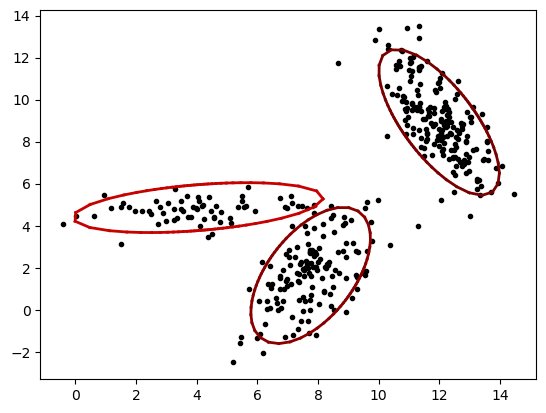

In [8]:
#define number of samples to generate
nData = 400

#generate data from the mixture of Gaussians
#make sure you've filled in the routine above.
data = mixGaussGen(mixGaussTrue,nData)

#draw data, true Gaussians
drawEMData2d(data,mixGaussTrue)

### Figure analysis: 

We have define our ground truth mixture of Gaussian (MoG) in the MixGaussTrue dictionray, and we now sample 400 data points from it. The figure above shows the data points and the 3 Gaussians that make up our MoG. The ground truth Gaussians are the ellipses that represent lines of equal probability. We see that the data is well represented by the ground truth MoG, which is what we expect and suggests a correct implementation of the functions. 

## Estimate MoG using the E-M Algorithm
Here we want to use the E-M algorithm to fit a MoG model to our data points. 

**TODO HERE:** 

Fill out the missing parts below. 

The log likelihood is taken since the raw likelihood value could be too small for our machine's percision.

In [9]:
def getMixGaussLogLike(data, mixGaussEst): 
    """
    Calculate the log likelihood for the whole dataset under a mixture of Gaussians model.
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    mixGaussEst -- dict containing the mixture of gaussians parameters.

    Returns: 
    logLike -- scalar containing the log likelihood.
    
    """
    data = np.atleast_2d(data)                                                                         
    # find total number of data items                                                                  
    _, nData = data.shape                                                                          
    
    # initialise log likelihoods                                                                       
    logLike = 0                                                                                       
                                                                                                       
    # run through each data item                                                                       
    for cData in range(nData):                                                                         
        thisData = data[:, cData]                                                                      
        # TO DO - calculate likelihood of this data point under mixture of                         
        # Gaussians model. Replace this                                                                
        # We initialise and calculate the likelihood of the data under each mixture component of Gaussians model
        like = []
        for k in range(mixGaussEst['k']):
            w_k = mixGaussEst['weight'][k]
            norm_const = (2*np.pi)**(-0.5*mixGaussEst["d"]) * (np.linalg.det(mixGaussEst["cov"][:,:,k])**(-0.5))
            exp_term = np.exp(-0.5*(np.transpose((thisData - mixGaussEst["mean"][:,k])) @ np.linalg.inv(mixGaussEst["cov"][:,:,k]) @ (thisData - mixGaussEst["mean"][:,k])))
            like.append(w_k * (norm_const * exp_term))
        like = np.array(like)
        total_like = np.sum(like)

        # The if statement is here to avoid taking the log of 0
        if total_like > 0:
            logLike += np.log(total_like)
        else:
            logLike += -np.inf
    return logLike

**TODO HERE:** 

Fill out the missing parts below. 

In [10]:
def fitMixGauss(data, k):
    """
    Estimate a k-component Mixture of Gaussians (MoG) model that fits the data.
    Incrementally plots the outcome during the fitting process.
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    k -- scalar representing the number of Gaussians to use in the MoG model.
    
    Returns: 
    mixGaussEst -- dict containing the estimated MoG parameters.
    """
    
    #     MAIN E-M ROUTINE  
    #     In the E-M algorithm, we calculate a complete posterior distribution over                                  
    #     the (nData) hidden variables in the E-Step.  
    #     In the M-Step, we update the parameters of the Gaussians (mean, cov, w).   

    nDims, nData = data.shape

    # initialise the posterior probabilities (responsibilities)
    post_prob_latent = np.zeros((k, nData))

    # Initialize the MoG parameters to random values
    mixGaussEst = dict()
    mixGaussEst['d'] = nDims
    mixGaussEst['k'] = k
    # Initialize weights uniformly
    mixGaussEst['weight'] = (1 / k) * np.ones(k)
    # Initialize means randomly
    mixGaussEst['mean'] = 2 * np.random.randn(nDims, k)
    # Initialize covariances to scaled identity matrices
    mixGaussEst['cov'] = np.zeros((nDims, nDims, k))
    for cGauss in range(k):
        scale = 2.5 + 1.5 * np.random.uniform()
        mixGaussEst['cov'][:, :, cGauss] = scale * np.eye(nDims)
    
    # calculate current likelihood
    # TO DO - fill in this routine
    logLike = getMixGaussLogLike(data, mixGaussEst)
    print('Log Likelihood Iter 0 : {:4.3f}\n'.format(logLike))

    nIter = 25

    fig, ax = plt.subplots(1, 1)

    for cIter in range(nIter):

        # =====================
        # Expectation Step
        # =====================

        responsibilities = []
        for cData in range(nData):
            thisData = data[:, cData]
            # We initilaise a list that will contain the unnormalized responsibility values
            l = []
            for k_1 in range(k):
                # We first extract parameters for the current Gaussian
                w_k = mixGaussEst['weight'][k_1]
                mu_k = mixGaussEst['mean'][:, k_1]
                cov_k = mixGaussEst['cov'][:, :, k_1]
                # We calculate the determinant and inverse of the covariance matrix
                det_cov_k = np.linalg.det(cov_k)
                inv_cov_k = np.linalg.inv(cov_k)
                # We calculate the normalisation constant 
                norm_const = (1.0 / ((2 * np.pi) ** (nDims / 2) * np.sqrt(det_cov_k)))

                diff = thisData - mu_k
                exponent = -0.5 * diff.T @ inv_cov_k @ diff
                # We compute the probability density
                N_k = norm_const * np.exp(exponent)
                l.append(w_k * N_k)

            # We normalise the responsibilities such that they sum to 1
            l = np.array(l)
            sum_l = np.sum(l)
            if sum_l == 0:
                l = np.ones(k) / k
            else:
                l = l / sum_l

            responsibilities.append(l)

        # We convert responsibilities to a k by nData array
        responsibilities = np.transpose(np.array(responsibilities))
        post_prob_latent = responsibilities

        # =====================
        # Maximization Step
        # =====================

        for cGauss in range(k):
            # We calculate the total responsibility for the current Gaussian,
            gamma_k = np.sum(post_prob_latent[cGauss, :])
            # update the mixing coefficients, means and covariance
            mixGaussEst['weight'][cGauss] = gamma_k / nData
            weighted_sum = np.dot(data, post_prob_latent[cGauss, :])
            mixGaussEst['mean'][:, cGauss] = weighted_sum / gamma_k
            diff = data - mixGaussEst['mean'][:, cGauss].reshape(-1, 1)
            # We multiply each column by the corresponding responsibility
            weighted_diff = diff * post_prob_latent[cGauss, :][np.newaxis, :]
            # and compute the weighted covariance matrix
            mixGaussEst['cov'][:, :, cGauss] = np.dot(weighted_diff, diff.T) / gamma_k
            # We ensure numerical stability by adding a very small constant
            mixGaussEst['cov'][:, :, cGauss] += 1e-6 * np.eye(nDims)

        # draw the updated solution
        drawEMData2d(data, mixGaussEst)
        plt.pause(0.1)
        fig.canvas.draw()

        # calculate the log likelihood
        logLike = getMixGaussLogLike(data, mixGaussEst)
        print('Log Likelihood After Iter {} : {:4.3f}\n'.format(cIter + 1, logLike))

    return mixGaussEst

### Time to put it all together!

Make sure you've filled all the TO DOs above! 

Log Likelihood Iter 0 : -9317.547



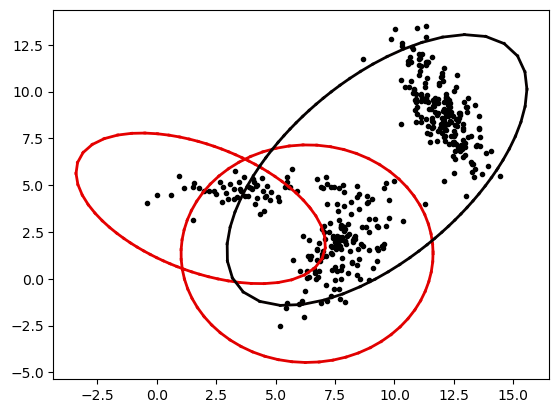

Log Likelihood After Iter 1 : -2023.620



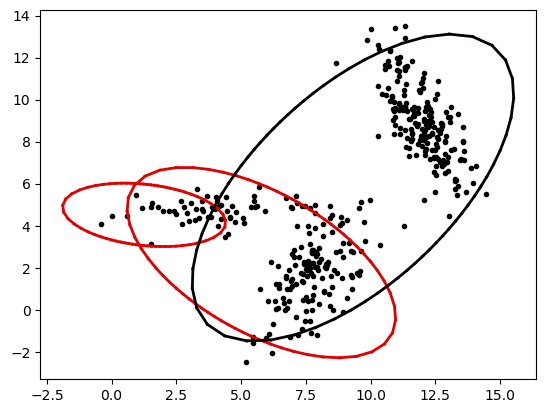

Log Likelihood After Iter 2 : -2002.477



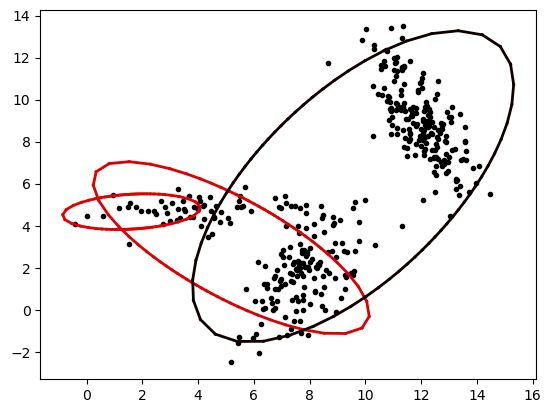

Log Likelihood After Iter 3 : -1954.831



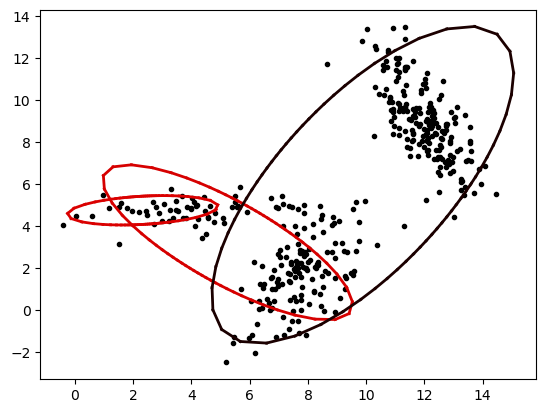

Log Likelihood After Iter 4 : -1905.623



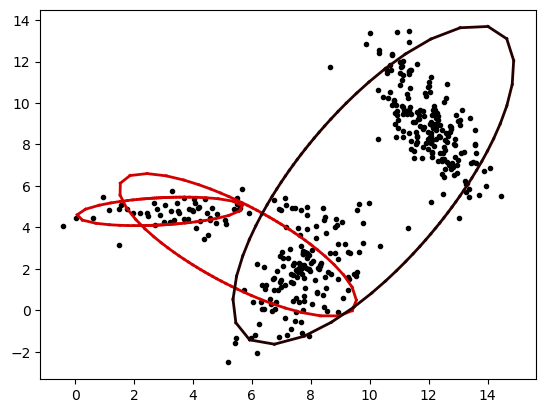

Log Likelihood After Iter 5 : -1880.039



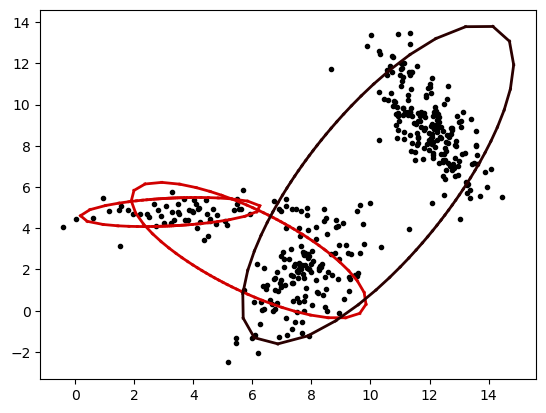

Log Likelihood After Iter 6 : -1871.657



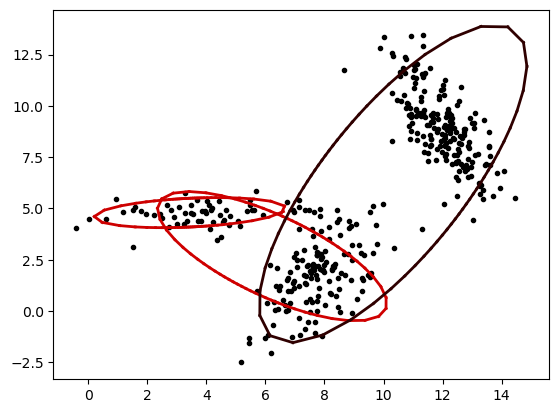

Log Likelihood After Iter 7 : -1867.688



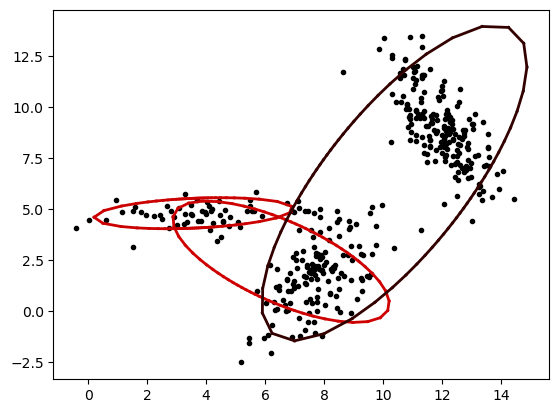

Log Likelihood After Iter 8 : -1864.508



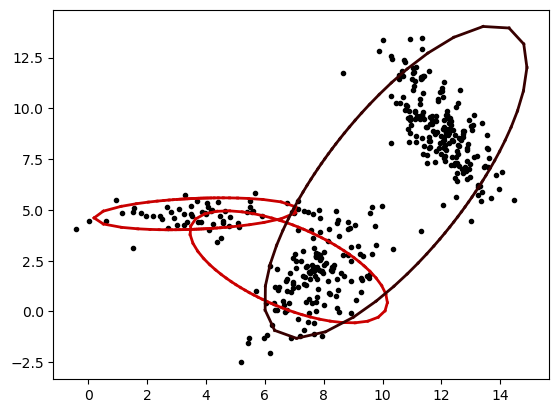

Log Likelihood After Iter 9 : -1860.839



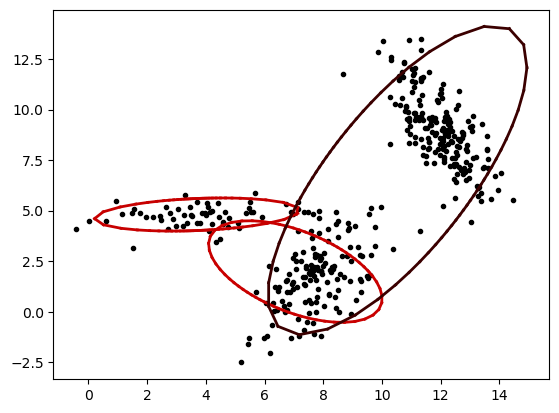

Log Likelihood After Iter 10 : -1855.210



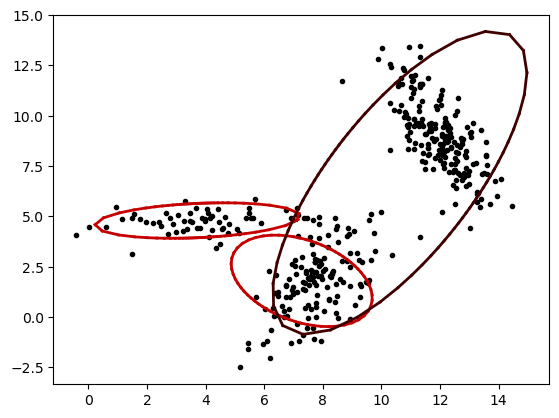

Log Likelihood After Iter 11 : -1843.975



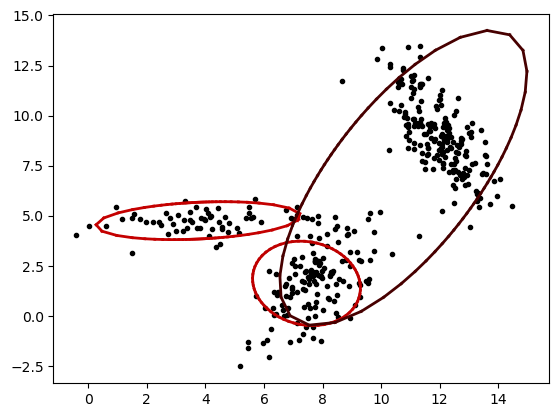

Log Likelihood After Iter 12 : -1826.474



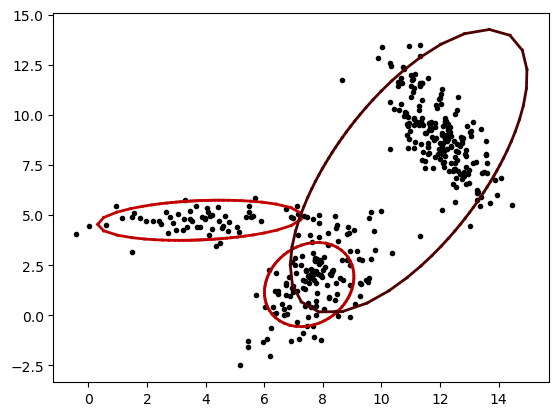

Log Likelihood After Iter 13 : -1809.957



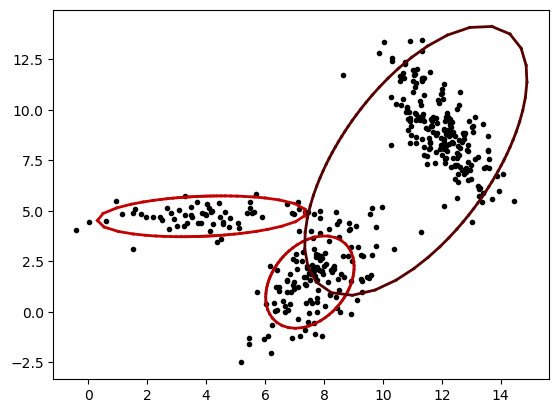

Log Likelihood After Iter 14 : -1797.182



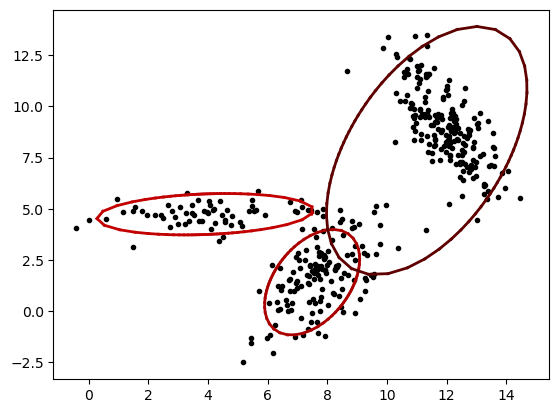

Log Likelihood After Iter 15 : -1775.532



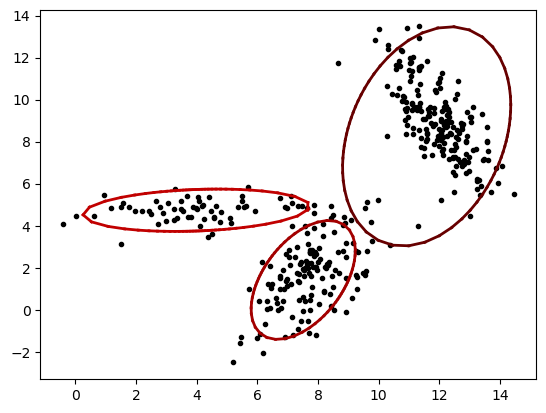

Log Likelihood After Iter 16 : -1738.648



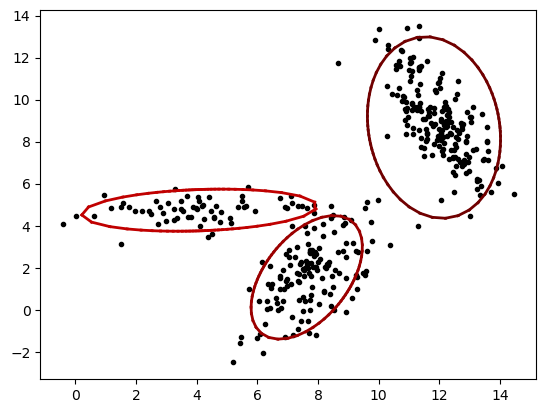

Log Likelihood After Iter 17 : -1673.400



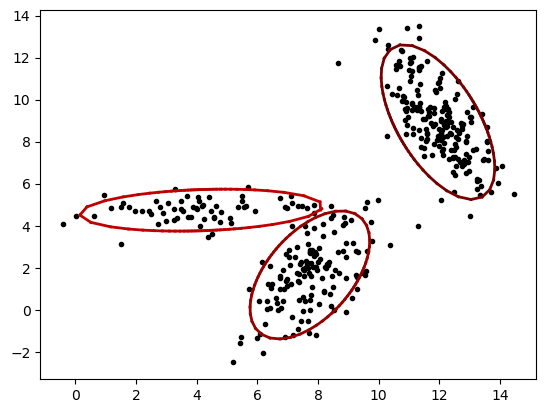

Log Likelihood After Iter 18 : -1610.720



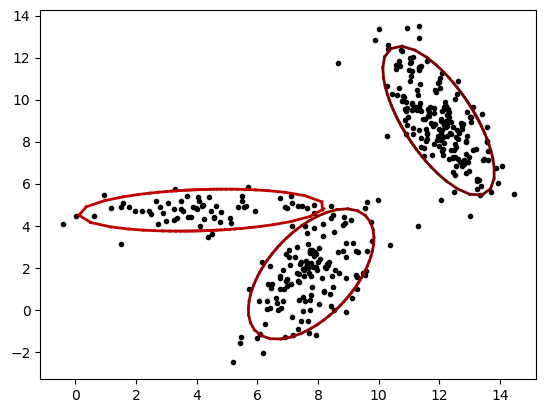

Log Likelihood After Iter 19 : -1603.911



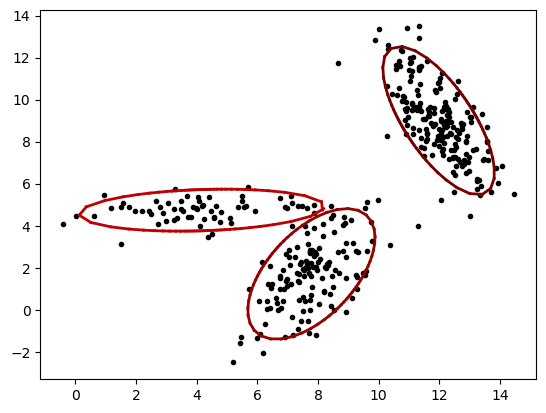

Log Likelihood After Iter 20 : -1603.819



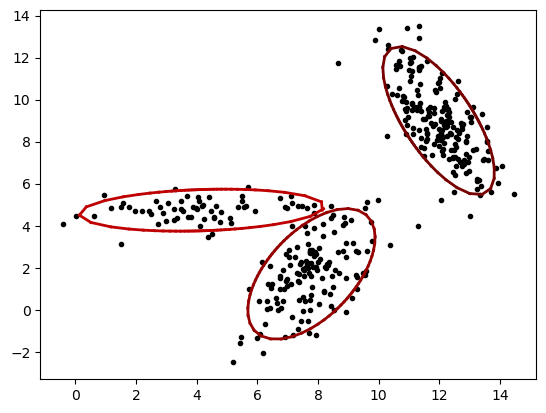

Log Likelihood After Iter 21 : -1603.818



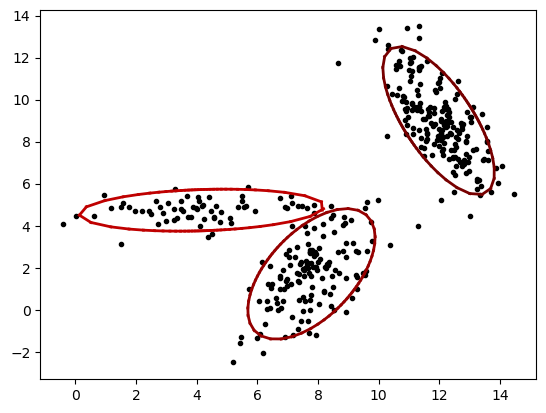

Log Likelihood After Iter 22 : -1603.818



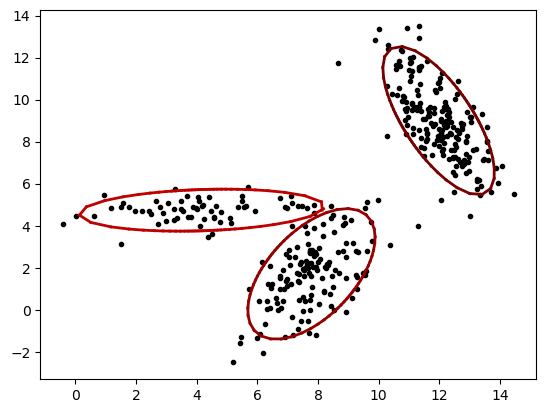

Log Likelihood After Iter 23 : -1603.818



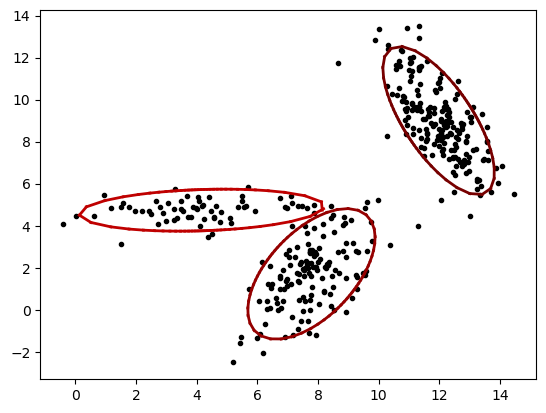

Log Likelihood After Iter 24 : -1603.818



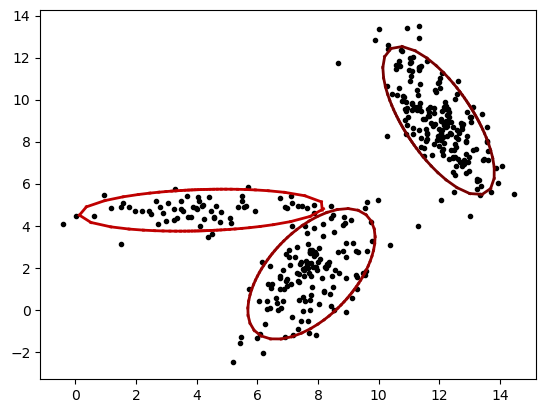

Log Likelihood After Iter 25 : -1603.818



In [11]:
#define number of components to estimate
nGaussEst = 3

#fit mixture of Gaussians (Pretend someone handed you some data. Now what?)
#TO DO fill in this routine (below)
mixGaussEst = fitMixGauss(data,nGaussEst)

### Figure analysis:

The first figure displayed shows data points that we sampled from the ground truth MoG distribution, as well as a randomly initialised mixture of Gaussians with three components. The paraneters of these Gaussians were randomly initialised in the firMixGauss function. As we perform more and more steps of the EM algorithm, we see that the log likelihood continues to increase and that the Gaussian components get closer and closer to the ground truth. In the final step of the iteration, the MoG looks very similar to the ground truth we've displayed in the first graph of the notebook, which suggests that the algorithm was implemented correctly. The algorithm could be improved however by stopping the iterations once the log-likelihood reaches a certain satisfactory threshold (or when the change in log-likelohood is very small), as we can see that the algorithm converged quickly and the final iterations didn't significantly change the log-likelihood. 